## Import Common Packages

In [1]:
import numpy as np
import pandas as pd

## Import Data

In [44]:
df = pd.read_csv('data/cereal.csv')

In [45]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


# 1. Define Problems

## How to choose good cereal for breakfast ?

 - Filtering top 10 cereals
 - Analyzing nutrition fact from top 10 cereals
 - Categorizing cereals based on feature data

# 2. Exploratory Data Analysist

In [46]:
df.shape

(77, 16)

## Data Cleaning

In [47]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

we have clean data, so we ready to work !!

In [48]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


Feature still have good data

##  Filtering Top 10 Most Valuable Cereals

In [148]:
top10=df.sort_values('rating',ascending=False)[:10]

In [149]:
top10

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.00,1.00,59.642837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505


In [62]:
import seaborn as sns

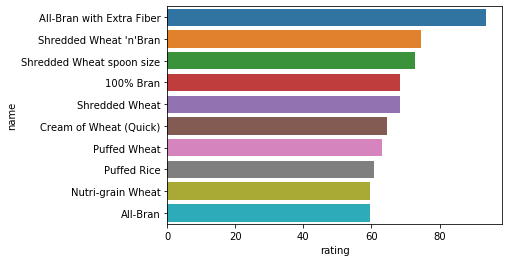

In [64]:
ax = sns.barplot(x='rating',y='name',data=top10)

So, here we have plot to show us rating by name 

## Analyzing nutrition fact from top 10 cereals

### Comparing with mean

In [66]:
top10

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.00,1.00,59.642837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505


In [65]:
top10.mean()

calories     74.000000
protein       2.900000
fat           0.200000
sodium       78.000000
fiber         4.800000
carbo        13.700000
sugars        1.300000
potass      143.900000
vitamins     10.000000
shelf         2.300000
weight        0.883000
cups          0.750000
rating       68.498242
dtype: float64

If we look at the data, Cereal No.1 have low calorie (50) compared with mean calories (74) and high nutrition including high fiber (14) vs mean fiber (4), high vitamin (25) vs mean vitamin (10), high protein (4) vs mean protein (2.9) 

**Then, is there any corelation between calories and ratings ?**

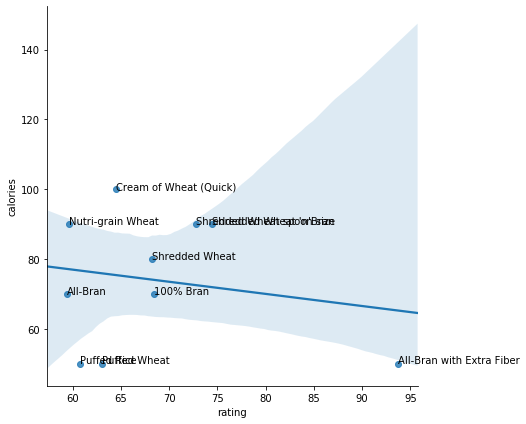

In [158]:
ax = sns.lmplot(size=6, x="rating", y="calories", data=top10)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.0001, point['y'], str(point['val']))

label_point(top10['rating'], top10['calories'], top10['name'], plt.gca()) 

Linear relationship between calories and ratings, lower calories better ratings

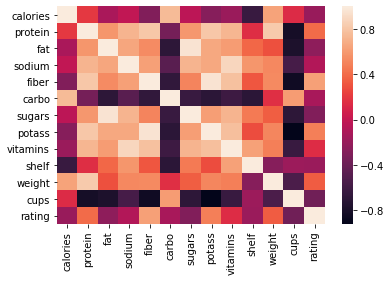

In [87]:
sns.heatmap(top10.corr(method='pearson'))

In [138]:
top10.corr()[12:13]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,procar
rating,-0.188924,0.404087,-0.234387,-0.076718,0.631456,-0.119282,-0.296769,0.484286,0.149946,-0.182566,0.34409,-0.370235,1.0,0.610256


as we can see, best valued cereal has good correlation with ***fiber, potass, and protein***

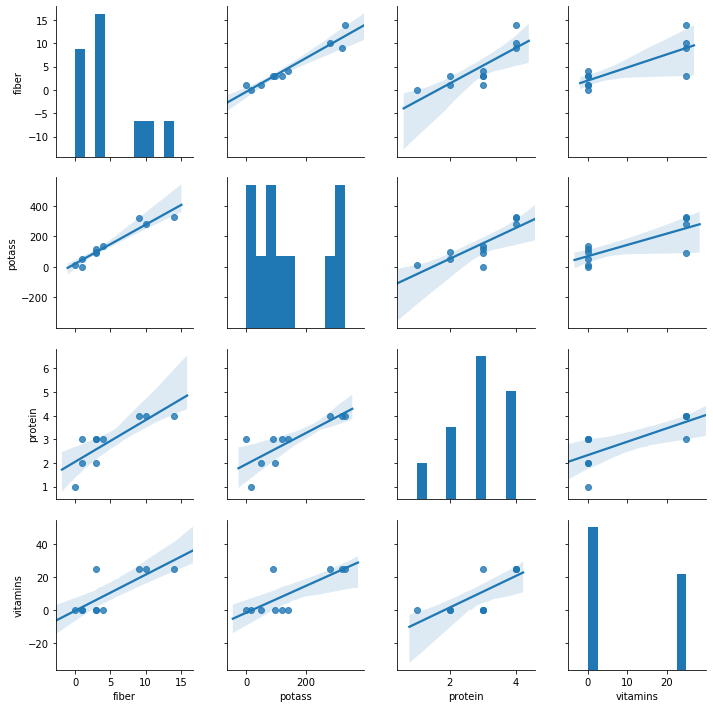

In [150]:
sns.pairplot(top10,vars=['fiber','potass','protein','vitamins'],kind='reg')

So, the relationship between this feature is direct relation.

## Categorizing Cereals Based On Feature Data 

### 1. Protein/Calories

[Protein/Calories ratio for diet cereals](https://www.delish.com/kitchen-tools/g4118/best-healthy-cereals-to-eat-if-youre-on-a-diet/)

So we have to add new feature, it's protein/calories ratio

In [118]:
top10["procar"] = top10.protein/top10.calories

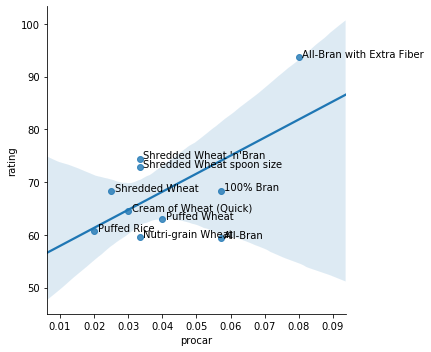

In [129]:
ax = sns.lmplot(size=5, x="procar", y="rating", data=top10)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.001, point['y'], str(point['val']))

label_point(top10['procar'], top10['rating'], top10['name'], plt.gca()) 

So based on data, if you want to diet with high protein but low calories, 
- **All-Bran with Extra Fiber** is best for you for High Protein Low Calorie
- **100% Bran, All-Bran** is good for someone who find High Calorie with Good Protein

There was specific option for someone who find low cal high protein, without looking the ratings, new Insight, new Options, specific needs cereals thats what we want

## 2. Hot/Cold

Based on data we can categorized cereals with how it serve

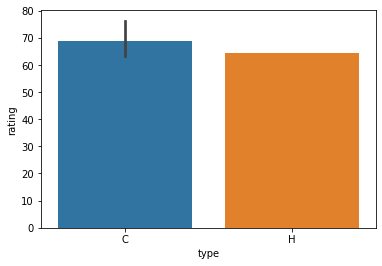

In [133]:
sns.barplot(x='type', y='rating', data=top10)

**Top 10 brand mostly serve with cold milk**

## 3. Manufacture 

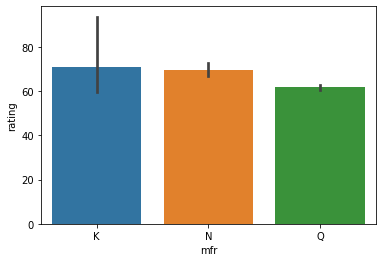

In [135]:
sns.barplot(x='mfr', y='rating', data=top10)

Kellogs is number 1 manufacture for best cereals based on data, Nabisco second position, and Quaker Oats in last position

# 3. Conclusion

- Top 10 cereal brand from this data have ratings between 59.4 - 94.7
- Top 10 cereal brand have linear relationship with calories. Lower calories Better ratings
- Fibers, vitamins, protein, and potass are good ingredients for better ratings
- Calories, fat , and sugar are bad ingredients for ratings and more influence that any feature
- All-Brand with Extra-Fiber,100% Bran, and All-Bran is good for diet cereal with low calories and high nutrition
- Top 10 cereal brand mostly serve with cold milk
- Top 10 cereal brand mosty manufactured by Kellogs, Nabisco, and Quaker Oats.